# Notebook 1: Data Acquisition and Exploratory Data Analysis

**Objective:** To connect to the WRDS and FRED databases, download all necessary raw time series data, perform initial validation and sanity checks, and save the raw data to the `/data/raw/` directory for future use.

In [26]:
%reload_ext autoreload
%autoreload 2
#Tells the kernel to automatically check for changes in imported files

In [27]:
import os
import sys
from pathlib import Path
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter
import seaborn as sns 
import wrds

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

from src import data_loader, feature_engineering, vix_extract_web_scrapper

print("Connecting to WRDS...")
# Create the connection object here
db = wrds.Connection() 
print("Connection Successful")


sns.set_style('whitegrid')

Connecting to WRDS...
Loading library list...
Done
Connection Successful


## WRDS Data: VIX and SPX Indices

Our first step is to acquire the daily price data for the VIX and SPX indices from the WRDS OptionMetrics database using our `give_raw_data` function in data_loader.py

In [28]:
#get data
vix_daily_raw_data = data_loader.give_raw_data(db_connection = db, ticker = 'VIX')
spx_daily_raw_data = data_loader.give_raw_data(db_connection=db, ticker = 'SPX')
vvix_daily_raw_data = data_loader.vvix_daily_raw_data


#store data
data_loader.store_raw_data(vix_daily_raw_data, 'vix_daily_raw.csv')
data_loader.store_raw_data(spx_daily_raw_data, 'spx_daily_raw.csv')
data_loader.store_raw_data(vvix_daily_raw_data, 'vvix_daily_raw.csv')
print("Data fetching and storing Completed.")
db.close()
print("WRDS connection is now closed.")

Data fetching and storing Completed.
WRDS connection is now closed.


## Validation and EDA

Now that the data is properly stored, we will load it back to do some validation checks. After storing the data, we want to see how it gets displayed when you retrieve it. For loading raw data, we can directly use the `load_raw_data` function from `data_loader.py` module.



In [29]:
#validation check for vix_data
vix_daily_raw = data_loader.load_raw_data('vix_daily_raw.csv')
vix_daily_raw

,date,close,open,high,low
0,1996-01-02,12.19,0.00,12.19,12.19
1,1996-01-03,12.10,0.00,12.10,12.10
2,1996-01-04,13.78,0.00,13.78,13.78
3,1996-01-05,13.58,0.00,13.58,13.58
4,1996-01-08,13.11,0.00,13.11,13.11
...,...,...,...,...,...
6958,2023-08-25,15.68,17.21,17.36,15.45
6959,2023-08-28,15.08,16.24,16.28,15.00
6960,2023-08-29,14.45,15.08,15.30,14.34
6961,2023-08-30,13.88,14.53,14.70,13.83


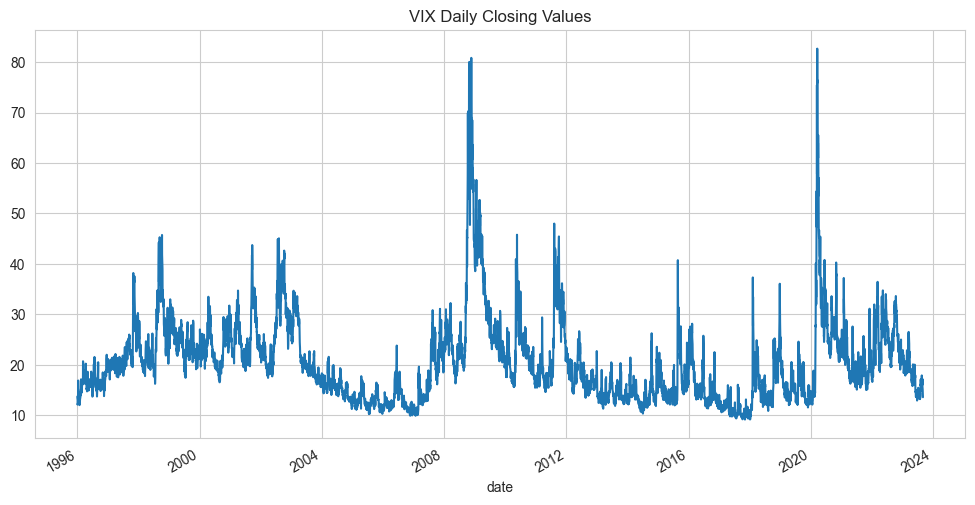

In [30]:
#Basic Visualization
vix_daily_raw['date'] = pd.to_datetime(vix_daily_raw['date'])
vix_daily_raw.plot(x = 'date', y = 'close',title='VIX Daily Closing Values', figsize=(12,6), legend = False)
plt.show()

In [31]:
#validation check for spx_data
spx_daily_raw = data_loader.load_raw_data('spx_daily_raw.csv')
spx_daily_raw

,date,close,open,high,low
0,1996-01-02,620.73,615.93,620.74,613.17
1,1996-01-03,621.32,620.73,623.25,619.56
2,1996-01-04,617.70,621.32,624.49,613.96
3,1996-01-05,616.71,617.70,617.70,612.02
4,1996-01-08,618.46,616.71,618.46,616.49
...,...,...,...,...,...
6960,2023-08-25,4405.71,4389.38,4418.46,4356.29
6961,2023-08-28,4433.31,4426.03,4439.56,4414.98
6962,2023-08-29,4497.63,4432.75,4500.14,4431.68
6963,2023-08-30,4514.87,4500.34,4521.65,4493.59


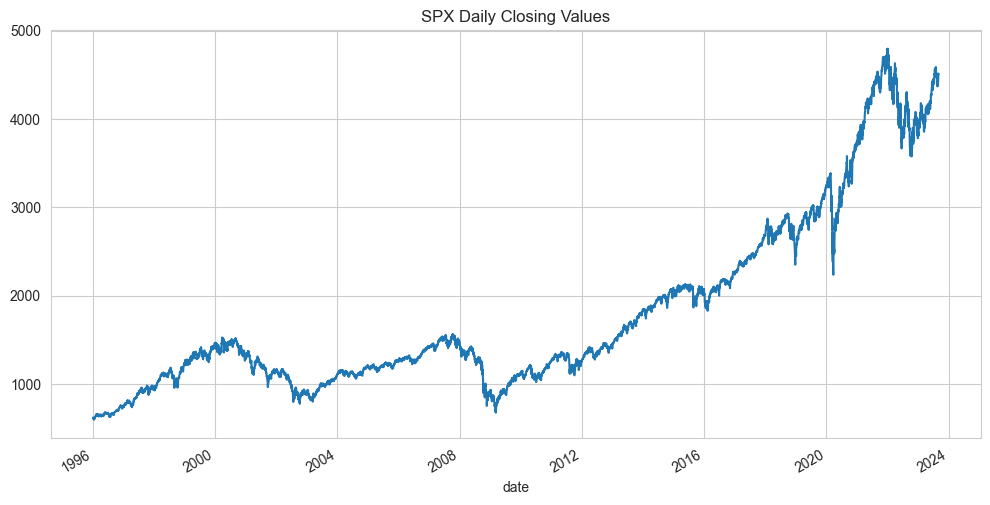

In [32]:
#Basic Visualization
spx_daily_raw['date'] = pd.to_datetime(spx_daily_raw['date'])  
spx_daily_raw.plot(x = 'date', y = 'close',title='SPX Daily Closing Values', figsize=(12,6), legend = False)
plt.show()

In [33]:
#validation check for vvix_data
vvix_daily_raw = data_loader.load_raw_data('vvix_daily_raw.csv')
vvix_daily_raw

,DATE,VVIX
0,03/06/2006,71.73
1,03/15/2006,15.71
2,03/16/2006,27.94
3,03/17/2006,28.60
4,03/20/2006,37.93
...,...,...
4857,09/22/2025,99.75
4858,09/23/2025,101.23
4859,09/24/2025,99.99
4860,09/25/2025,100.34


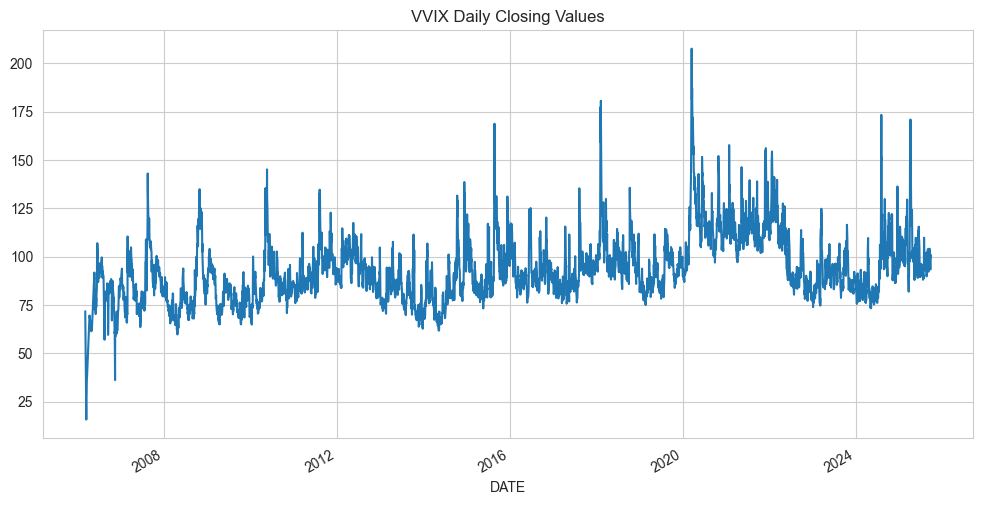

In [34]:
#Basic Visualization
vvix_daily_raw['DATE'] = pd.to_datetime(vvix_daily_raw['DATE'])
vvix_daily_raw.plot(x = 'DATE', y= 'VVIX',title='VVIX Daily Closing Values', figsize=(12,6), legend=False)
plt.show()

Other relevant features coded till now are `vix_change_5d` , `credit_spread_high_yield`,   `credit_spread_change_21d`, `spx_realized_vol_21d`

Lets retrieve and store datasets for these attributes - and perform correponding validation and basic visualization.

In [35]:
credit_spread_high_yield = data_loader.give_raw_fred_data('BAMLH0A0HYM2')  
credit_spread_high_yield.name = 'BofA US High Yield Index Spread'
credit_spread_high_yield.index.name = 'date'
credit_spread_high_yield = credit_spread_high_yield.reset_index(drop=False) 

In [36]:
#Lets store this data
data_loader.store_raw_data(credit_spread_high_yield, 'credit_spread_high_yield.csv')
print("Credit Spread High Yield data stored.\n")
#retrieving to see what the stored data looks like for validation check
print("Retrieving stored Credit Spread High Yield data for validation...")
stored_credit_spread_high_yield = data_loader.load_raw_data('credit_spread_high_yield.csv')
stored_credit_spread_high_yield

Credit Spread High Yield data stored.

Retrieving stored Credit Spread High Yield data for validation...


,date,BofA US High Yield Index Spread
0,1996-12-31,3.13
1,1997-01-01,NaN
2,1997-01-02,3.06
3,1997-01-03,3.09
4,1997-01-06,3.10
...,...,...
7593,2025-09-24,2.70
7594,2025-09-25,2.76
7595,2025-09-26,2.75
7596,2025-09-29,2.74


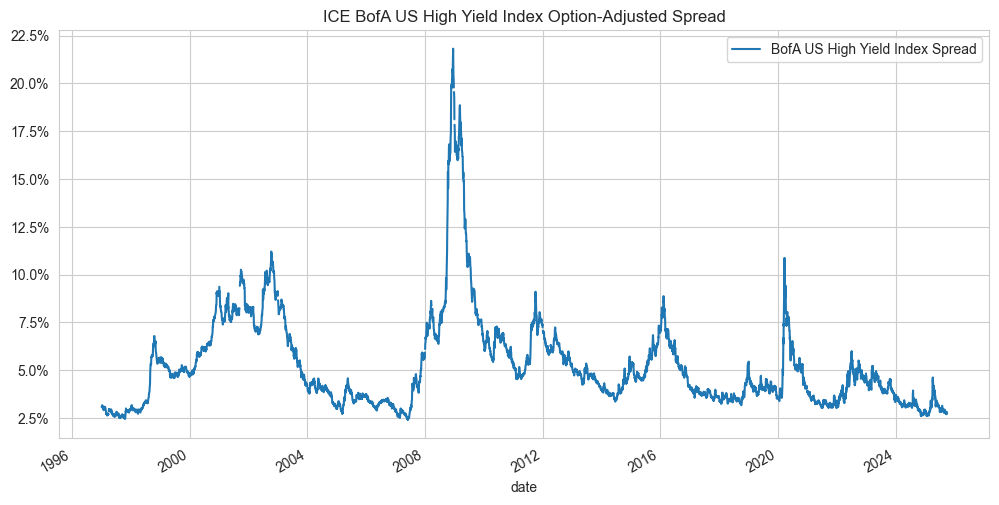

In [37]:
#Basic Visualization
ax = credit_spread_high_yield.plot(
    x='date', 
    y='BofA US High Yield Index Spread', 
    title='ICE BofA US High Yield Index Option-Adjusted Spread', 
    figsize=(12,6), 
    legend=True
)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

In [38]:
#Retrieving Credit Spread High Yield 21 Day Momentum
credit_spread_high_yield_change_21d = feature_engineering.calculate_momentum(credit_spread_high_yield.set_index('date')['BofA US High Yield Index Spread'], window=21)      
credit_spread_high_yield_change_21d.name = 'Credit Spread High Yield Change 21D'        
credit_spread_high_yield_change_21d = credit_spread_high_yield_change_21d.reset_index(drop=False)

/Users/pustak/Desktop/ml_risk_overlay/src/feature_engineering.py:30: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  momentum = data_series.pct_change(periods=window)


In [39]:
#Lets store this data
data_loader.store_raw_data(credit_spread_high_yield_change_21d, 'credit_spread_high_yield_change_21d.csv')
print("Credit Spread High Yield Change 21D data stored.\n")
#retrieving to see what the stored data looks like for validation check
print("Retrieving stored Credit Spread High Yield Change 21D data for validation...")
credit_spread_high_yield_change_21d = data_loader.load_raw_data('credit_spread_high_yield_change_21d.csv')
credit_spread_high_yield_change_21d

Credit Spread High Yield Change 21D data stored.

Retrieving stored Credit Spread High Yield Change 21D data for validation...


,date,Credit Spread High Yield Change 21D
0,1996-12-31,NaN
1,1997-01-01,NaN
2,1997-01-02,NaN
3,1997-01-03,NaN
4,1997-01-06,NaN
...,...,...
7593,2025-09-24,-0.028777
7594,2025-09-25,0.003636
7595,2025-09-26,-0.024823
7596,2025-09-29,-0.035211


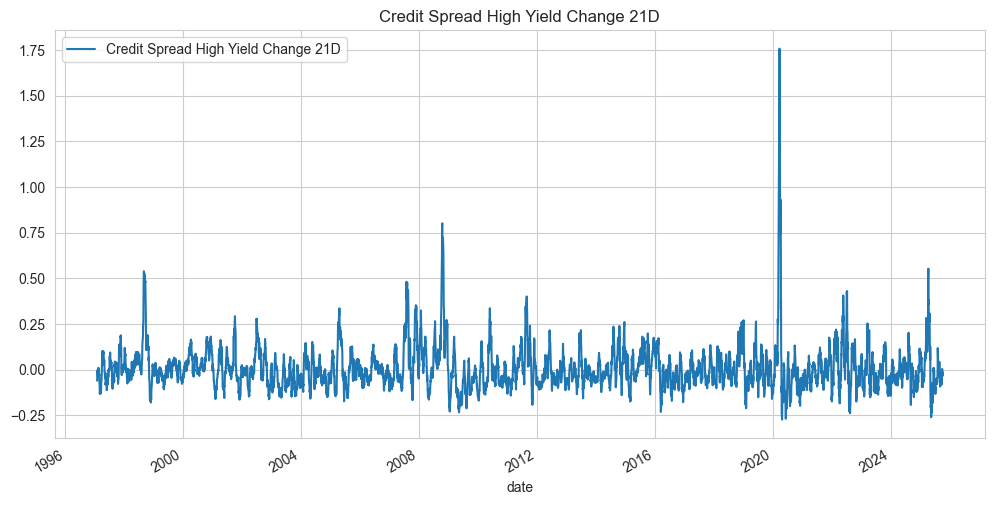

In [40]:
#Basic Visualization
credit_spread_high_yield_change_21d['date'] = pd.to_datetime(credit_spread_high_yield_change_21d['date'])   
credit_spread_high_yield_change_21d.plot(x = 'date', y = 'Credit Spread High Yield Change 21D', title='Credit Spread High Yield Change 21D', figsize=(12,6))
plt.show()    

In [41]:
#Retrieving SPX Realized Volatility 21D
spx_close_prices = spx_daily_raw_data['close']
spx_close_prices.index = pd.to_datetime(spx_daily_raw['date'])
spx_realized_vol_21d = feature_engineering.calculate_realized_volatility(spx_close_prices, window=21)
spx_realized_vol_21d.name = 'SPX Realized Volatility 21D'
spx_realized_vol_21d = spx_realized_vol_21d.reset_index(drop=False)

In [42]:
#Storing the data
data_loader.store_raw_data(spx_realized_vol_21d, 'spx_realized_vol_21d.csv')
print("SPX Realized Volatility 21D data stored.\n")
#retrieving to see what the stored data looks like for validation check
print("Retrieving stored SPX Realized Volatility 21D data for validation...")
spx_realized_vol_21d = data_loader.load_raw_data('spx_realized_vol_21d.csv')
spx_realized_vol_21d

SPX Realized Volatility 21D data stored.

Retrieving stored SPX Realized Volatility 21D data for validation...


,date,SPX Realized Volatility 21D
0,1996-01-02,NaN
1,1996-01-03,NaN
2,1996-01-04,NaN
3,1996-01-05,NaN
4,1996-01-08,NaN
...,...,...
6960,2023-08-25,0.119449
6961,2023-08-28,0.115791
6962,2023-08-29,0.128091
6963,2023-08-30,0.128970


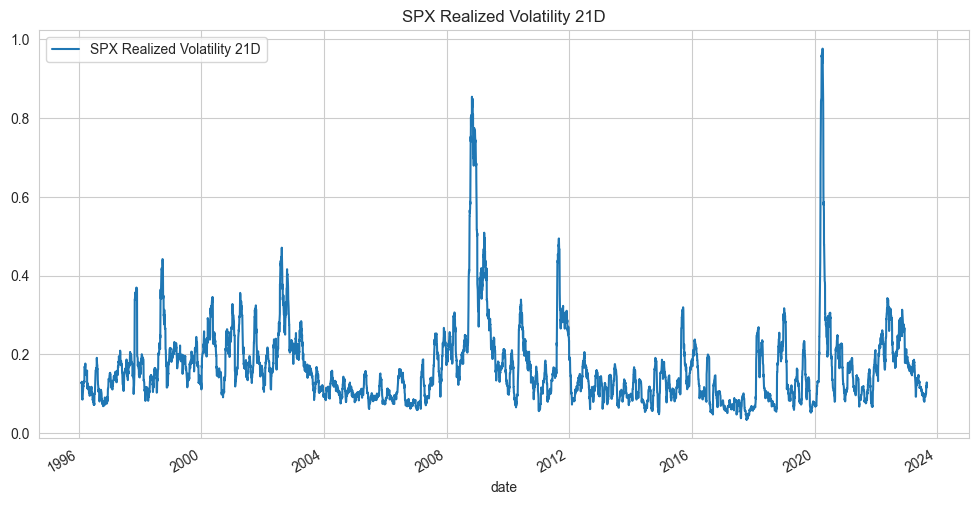

In [43]:
#Basic Visualization
spx_realized_vol_21d['date'] = pd.to_datetime(spx_realized_vol_21d['date'])
spx_realized_vol_21d.plot(x = 'date' , y = 'SPX Realized Volatility 21D', title='SPX Realized Volatility 21D', figsize=(12,6))
plt.show()

In [44]:
#Retrieving VIX 5 Day Momentum
vix_change_5d = feature_engineering.calculate_momentum(vix_daily_raw.set_index('date')['close'], window=5)
vix_change_5d.name = 'VIX Change 5D'
vix_change_5d = vix_change_5d.reset_index(drop=False)   

In [45]:
#Lets store this data
data_loader.store_raw_data(vix_change_5d, 'vix_change_5d.csv')
print("VIX Change 5D data stored.\n")
#retrieving to see what the stored data looks like for validation check
print("Retrieving stored VIX Change 5D data for validation...")
vix_change_5d = data_loader.load_raw_data('vix_change_5d.csv')
vix_change_5d

VIX Change 5D data stored.

Retrieving stored VIX Change 5D data for validation...


,date,VIX Change 5D
0,1996-01-02,NaN
1,1996-01-03,NaN
2,1996-01-04,NaN
3,1996-01-05,NaN
4,1996-01-08,NaN
...,...,...
6958,2023-08-25,-0.093642
6959,2023-08-28,-0.119673
6960,2023-08-29,-0.148497
6961,2023-08-30,-0.131414


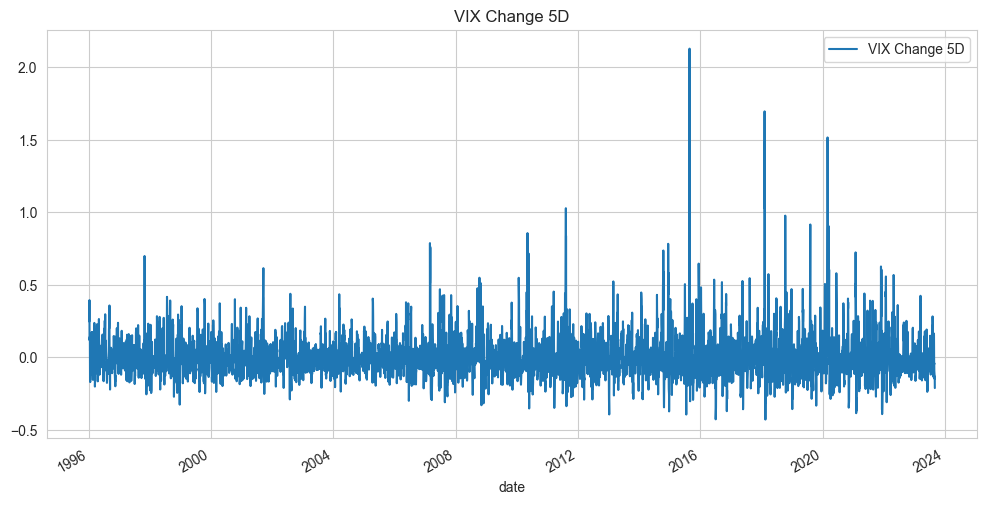

In [46]:
#Basic Visualization
vix_change_5d['date'] = pd.to_datetime(vix_change_5d['date'])
vix_change_5d.plot(x = 'date', y = 'VIX Change 5D', title='VIX Change 5D', figsize=(12,6))
plt.show()

In [47]:
#Retrieving Yield Curve Slope 10Y/2Y
#Note that though "Slope" is technically a widely used misnomer in this context 
#In professional finance - people are simply referring to the spread when they talk about it.
yield_curve_slope_10y_2y = data_loader.give_raw_fred_data('T10Y2Y')
yield_curve_slope_10y_2y.name = 'Yield Curve Slope 10Y/2Y'
yield_curve_slope_10y_2y.index.name = 'date'
yield_curve_slope_10y_2y = yield_curve_slope_10y_2y.reset_index(drop = False)

In [48]:
#storing the data
data_loader.store_raw_data(yield_curve_slope_10y_2y, 'yield_curve_slope_10y_2y.csv')
print("Yield Curve Slope 10Y/2Y data stored.\n")        
#retrieving to see what the stored data looks like for validation check 
print("Retrieving stored Yield Curve Slope 10Y/2Y data for validation...")
yield_curve_slope_10y_2y = data_loader.load_raw_data('yield_curve_slope_10y_2y.csv')
yield_curve_slope_10y_2y

Yield Curve Slope 10Y/2Y data stored.

Retrieving stored Yield Curve Slope 10Y/2Y data for validation...


,date,Yield Curve Slope 10Y/2Y
0,1976-06-01,0.68
1,1976-06-02,0.71
2,1976-06-03,0.70
3,1976-06-04,0.77
4,1976-06-07,0.79
...,...,...
12867,2025-09-25,0.54
12868,2025-09-26,0.57
12869,2025-09-29,0.52
12870,2025-09-30,0.56


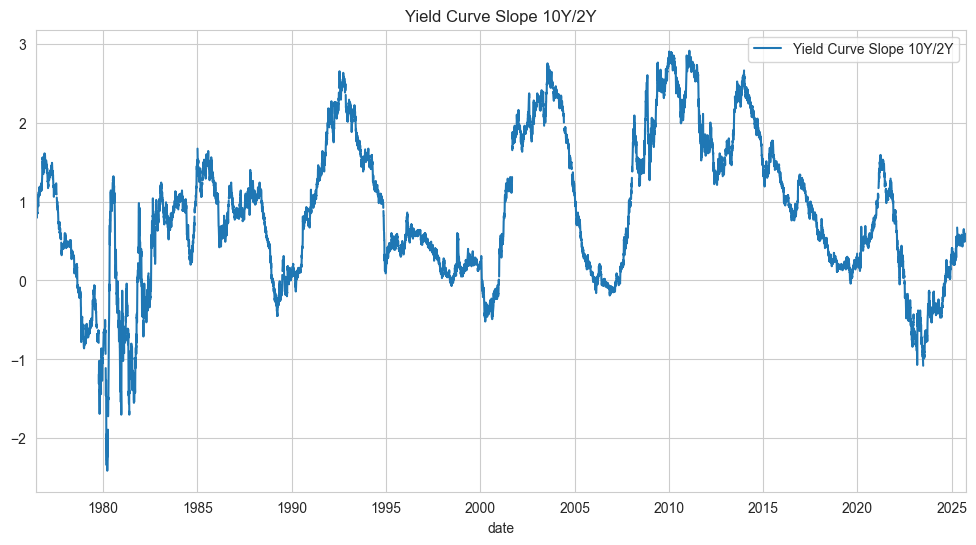

In [49]:
#Basic Visualization
yield_curve_slope_10y_2y['date'] = pd.to_datetime(yield_curve_slope_10y_2y['date'])
yield_curve_slope_10y_2y.plot(x = 'date', y = 'Yield Curve Slope 10Y/2Y', title = 'Yield Curve Slope 10Y/2Y', figsize=(12,6))
plt.show()

### Working on Remaining Attributes pertaining VIX Futures Term Structure

We need to address the remaining two attributes related to VIX Futures Term structure:

**Term_Structure_Ratio_1_0**

**Term_Structure_Slope_2_1**

**Current Challenge:**  
Accessing VIX Futures Historical Data via WRDS is not possible with the current institutional access through HKU.

**Proposed Solution:**  
We will implement web scraping to obtain the necessary data. 

**Implementation Details:**  
- A module named `vix_extract_web_scrapper.py` has been created for this purpose.  
- This module includes functions to:  
  1. Scrape the relevant VIX Futures data from the cboe websites: https://www.cboe.com/us/futures/market_statistics/historical_data/ and https://www.cboe.com/us/futures/market_statistics/historical_data/archive/ .  
  2. Store the downloaded data into the designated folders for further processing.


In [50]:
#Web Scrapping VIX Futures Data Links
modern_links =   vix_extract_web_scrapper.fetch_modern_links()
archived_links = vix_extract_web_scrapper.fetch_archive_links()
all_relevant_links = vix_extract_web_scrapper.refine_and_combine_links(modern_links,archived_links)

In [51]:
#Validation check for web scrapped links
refined_list = all_relevant_links
print(f"Total number of relevant links found: {len(refined_list)}") 
print('-'*100) 
print("First 5 links in the refined list:")
for link in refined_list[:5]:
    print(link)
print("Last 5 links in the refined list:")
for link in refined_list[-5:]:
    print(link)

Total number of relevant links found: 240
----------------------------------------------------------------------------------------------------
First 5 links in the refined list:
https://cdn.cboe.com/resources/futures/archive/volume-and-price/CFE_F06_VX.csv
https://cdn.cboe.com/resources/futures/archive/volume-and-price/CFE_G06_VX.csv
https://cdn.cboe.com/resources/futures/archive/volume-and-price/CFE_H06_VX.csv
https://cdn.cboe.com/resources/futures/archive/volume-and-price/CFE_J06_VX.csv
https://cdn.cboe.com/resources/futures/archive/volume-and-price/CFE_K06_VX.csv
Last 5 links in the refined list:
https://cdn.cboe.com/data/us/futures/market_statistics/historical_data/VX/VX_2025-08-20.csv
https://cdn.cboe.com/data/us/futures/market_statistics/historical_data/VX/VX_2025-09-17.csv
https://cdn.cboe.com/data/us/futures/market_statistics/historical_data/VX/VX_2025-10-22.csv
https://cdn.cboe.com/data/us/futures/market_statistics/historical_data/VX/VX_2025-11-19.csv
https://cdn.cboe.com/data

In [52]:
#Download and save the csv files using the links
save_location = "../data/raw/vix_futures_data"
vix_extract_web_scrapper.download_csv_files(refined_list, save_location)


Starting download of 240 files into '../data/raw/vix_futures_data'...
  Successfully downloaded CFE_F06_VX.csv
  Successfully downloaded CFE_G06_VX.csv
  Successfully downloaded CFE_H06_VX.csv
  Successfully downloaded CFE_J06_VX.csv
  Successfully downloaded CFE_K06_VX.csv
  Successfully downloaded CFE_M06_VX.csv
  Successfully downloaded CFE_N06_VX.csv
  Successfully downloaded CFE_Q06_VX.csv
  Successfully downloaded CFE_U06_VX.csv
  Successfully downloaded CFE_V06_VX.csv
  Successfully downloaded CFE_X06_VX.csv
  Successfully downloaded CFE_Z06_VX.csv
  Successfully downloaded CFE_F07_VX.csv
  Successfully downloaded CFE_G07_VX.csv
  Successfully downloaded CFE_H07_VX.csv
  Successfully downloaded CFE_J07_VX.csv
  Successfully downloaded CFE_K07_VX.csv
  Successfully downloaded CFE_M07_VX.csv
  Successfully downloaded CFE_N07_VX.csv
  Successfully downloaded CFE_Q07_VX.csv
  Successfully downloaded CFE_U07_VX.csv
  Successfully downloaded CFE_V07_VX.csv
  Successfully downloaded C